In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-20 11:01:17.760543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-20 11:01:17.769437: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-20 11:01:17.772105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 11:01:18.233316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_path = "../../data/sgdm_wobn"
image_path = "./images"
lr_to_p_fn = lambda js: np.sqrt(0.001/js["optimizer"]["lr"])
lr_to_log_fn = lambda js: np.log(js["optimizer"]["lr"])
wd_to_log_fn = lambda js: np.log(js["optimizer"]["lambda_wd"])
p_to_p_fn = lambda js: js["norm"]["norm_multiply"]
acc_fn = lambda p : max_acc(get_stats(p,"test_stats"))

Max test accuracy of Standard is 81.9% with lr 0.0064


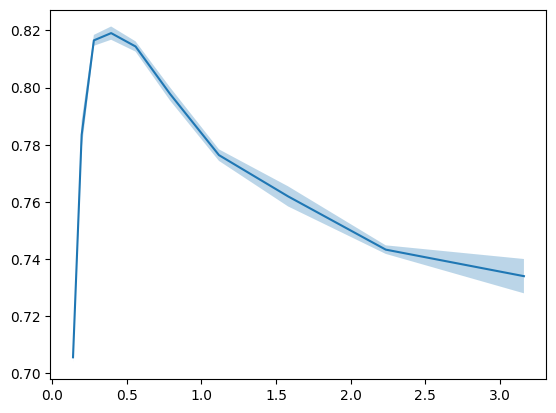

In [3]:
x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),lr_to_p_fn, acc_fn,plt, norm=False,label="noreg")
print("Max test accuracy of Standard is {0}% with lr {1}".format(round(100*y.max(),2),round(0.001/(x[y.argmax()]**2),6)))


Max test accuracy of norm is 83.47% with p 0.8
Max test accuracy of center_norm is 86.15% with p 0.7
Max test accuracy of center_norm_uncenter is 83.29% with p 0.7
Max test accuracy of global_center_std_uncenter is 83.13% with p 0.8
Max test accuracy of wd is 82.99% with lambda 0.0003200000000000001


(<matplotlib.legend.Legend at 0x7b6dfeaea510>,
 <matplotlib.legend.Legend at 0x7b6dfeadc9b0>)

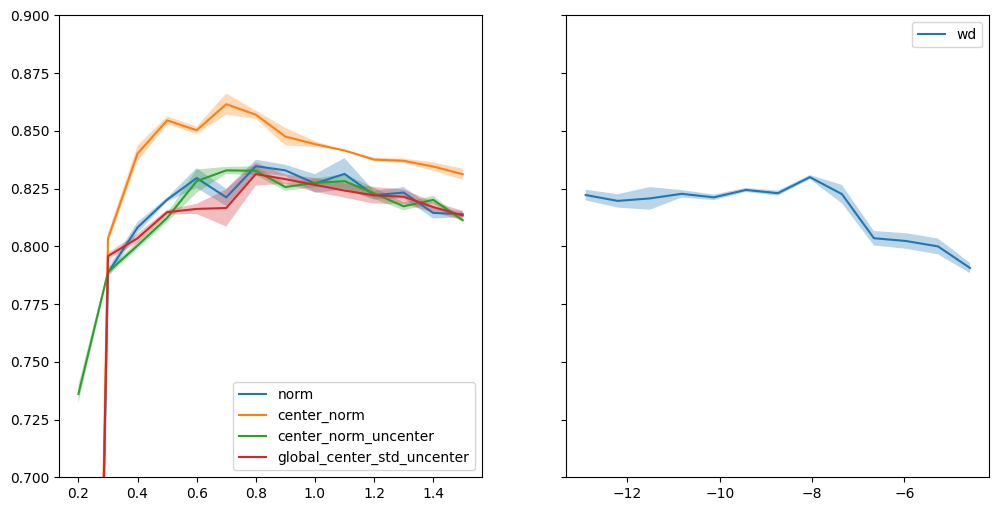

In [4]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey="row")

for exp in ["norm","center_norm","center_norm_uncenter","global_center_std_uncenter"]:
    x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}",skip=lambda s : s.endswith("0")),p_to_p_fn,acc_fn, axs[0], norm=False, label=exp)
    print("Max test accuracy of {0} is {1}% with p {2}".format(exp,round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/wd"),wd_to_log_fn,acc_fn,axs[1], norm=False,label="wd")
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))


fig.set_size_inches(12,6)
axs[0].set_ylim(0.7,0.9)
axs[0].legend(),axs[1].legend()

In [ ]:
"""
import json
writer = write(name="s_wobn",path="../../run/sgdm_wobn",h=12,max_tasks=11)
for norm_fn in ["norm","center_norm_uncenter","center_norm","global_center_std_uncenter"]:
    for p in [0.2,0.3,0.4]:
        with open("../../data/sgdm_wobn/noreg/0.0064/settings.json", "r") as f:
            js = json.load(f)

        del js["save_path"]
        js["num_steps"] = 100000
        js["save_args"]["save_states_every"] = 100000
        js["save_args"]["save_grad_every"] = -1
        js["at_step"] = 0
        js["norm"]["norm_every"] = 1
        js["norm"]["norm_multiply"] = p
        js["norm"]["norm_fn"] = norm_fn
        js["norm"]["apply_norm_to"] = "conv&kernel|out&kernel"

        os.makedirs(f"../../data/sgdm_wobn/{norm_fn}/{p}_1",exist_ok=True)
        with open(f"../../data/sgdm_wobn/{norm_fn}/{p}_1/settings.json","w") as f:
            json.dump(js,f)

        writer.write(f"python code/main.py ./data/sgdm_wobn/{norm_fn}/{p}_1/ --reset \n")

start_wd = 0.00001
for i in range(3):
    with open("../../data/sgdm_wobn/noreg/0.0064/settings.json", "r") as f:
        js = json.load(f)

    wd = start_wd/(2**i)
    js["optimizer"]["lambda_wd"] = wd
    js["optimizer"]["apply_wd_to"] = "conv&kernel|out&kernel"

    os.makedirs(f"../../data/sgdm_wobn/wd/{str(round(wd,8))}",exist_ok=True)
    with open(f"../../data/sgdm_wobn/wd/{str(round(wd,8))}/settings.json","w") as f:
        json.dump(js,f)

    writer.write(f"python code/main.py ./data/sgdm_wobn/wd/{str(round(wd,8))}/ --reset \n")

"""
    

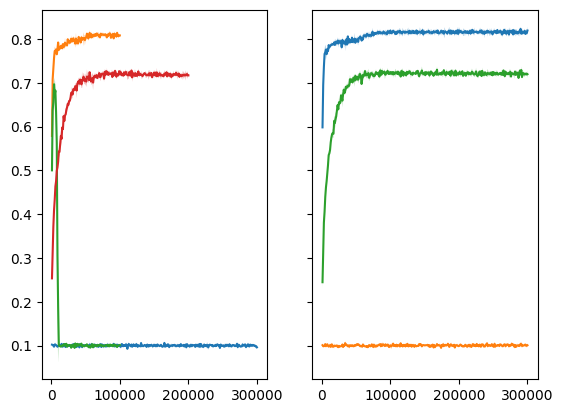

In [3]:
fig,axs = plt.subplots(nrows=1,ncols=2,sharey="row")

plot_step_stat(get_stats("../../data/test/noreg","test_stats")["acc"],axs[0])
plot_step_stat(get_stats("../../data/sgdm_wobn/noreg/0.0064/","test_stats")["acc"],axs[0])
plot_step_stat(get_stats("../../data/sgdm_wobn/noreg/0.0512/","test_stats")["acc"],axs[0])
plot_step_stat(get_stats("../../data/sgdm_wobn/noreg/0.0001/","test_stats")["acc"],axs[0])

plot_step_stat(get_stats("../../data/sgdm_wobn/norm/1.0_1","test_stats")["acc"],axs[1])
plot_step_stat(get_stats("../../data/test/norm","test_stats")["acc"],axs[1])
plot_step_stat(get_stats("../../data/test/norm2","test_stats")["acc"],axs[1])
#plot_step_stat(get_stats("../../data/test/norm3","test_stats")["acc"],axs[1])

